In [7]:
import importlib
import matplotlib.pyplot as plt
import sys

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Evolution_of_the_entropy/')
import Parallel_Run_Average_Entropy_Shared_Mem
importlib.reload(Parallel_Run_Average_Entropy_Shared_Mem)
from Parallel_Run_Average_Entropy_Shared_Mem import *


sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Analysis/')
sys.path.append('/home/hugo/PostDoc/aging_condensates/Gillespie/Analysis/')
import ToolBox
importlib.reload(ToolBox)
from ToolBox import *

sys.path.append('/home/hcleroy/Extra_Module_py')
sys.path.append('/home/hugo/Extra_Module_py')
import formated_matplotlib

Ec = lambda L,N : 3/2*np.log(L/N* np.pi/3)

In [4]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 100/(V) # for 1D
Energy = -15
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 200000
compute_steps = 30

5.937210903914155


In [5]:
for i in range(Nprocess):
    args[i][0] = 10**2
STE2 = average_simulations(args,step_tot,compute_steps)
for i in range(Nprocess):
    args[i][0] = 10**3
STE3 = average_simulations(args,step_tot,compute_steps)
for i in range(Nprocess):
    args[i][0] = 10**4
STE4 = average_simulations(args,step_tot,compute_steps)

2.749150000000002
5.5144449999999985
14.564985000000002


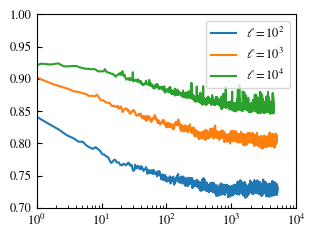

In [13]:
plt.plot(STE2[:,0],STE2[:,1]/MaxEnt(20,10**2),label=r'$\ell = 10^2$')#/abs(min(STE2[:,1])))
plt.plot(STE3[:,0],STE3[:,1]/MaxEnt(20,10**3),label=r'$\ell = 10^3$')#/abs(min(STE3[:,1])))
plt.plot(STE4[:,0],STE4[:,1]/MaxEnt(20,10**4),label=r'$\ell = 10^4$')#/abs(min(STE4[:,1])))
plt.xscale('log')
plt.legend()
plt.ylim(0.7,1.)
plt.xlim(1,10**4)
#plt.savefig('S_t_ell.svg',transparent=True,bbox_inches='tight')